***NULL ANALYSIS***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from dotenv import load_dotenv

load_dotenv()
import os

Load the data

In [3]:
# get data
DATA_DIR = './Data/'
FILE = 'spotify_tracks_kaggle_weekly.csv'
# FILE = 'spotify_2023.csv'



In [4]:
data = pd.read_csv(DATA_DIR + FILE, encoding='latin-1')

Overview

In [5]:
data.isnull().sum()

track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64

***determine 'null' values for each column***

In [6]:
copy_data = data.copy()
copy_data['year'].describe()
copy_data['popularity'].describe()
copy_data['acousticness'].describe()  # -1
copy_data['danceability'].describe() # -1
copy_data['duration_ms'].describe()
copy_data['energy'].describe() # -1
copy_data['instrumentalness'].describe() # -1
copy_data['liveness'].describe() # -1
copy_data['loudness'].describe()  #-1000000?
copy_data['speechiness'].describe() # -1
copy_data['tempo'].describe() # -1
copy_data['valence'].describe() # -1


count    62317.000000
mean         0.495226
std          0.264787
min         -1.000000
25%          0.292000
50%          0.507000
75%          0.710000
max          0.995000
Name: valence, dtype: float64

In [7]:
# for each attribute with nans, we replace the found nans and replace them and then use dropna

for i in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']:
    copy_data[i] = copy_data[i].replace(-1, np.nan)

copy_data = copy_data.dropna()

In [8]:
print(data.shape, ' -> ', copy_data.shape)

(62317, 22)  ->  (62282, 22)


The number of Nans is not very significant we can just drop them.
They mostly used -1 for missing values which pulled the mean and other stats down.

***Difference matrix of correlations before and after removing outliers***

Text(0.5, 1.0, 'Difference of correlations between cleaned and original data')

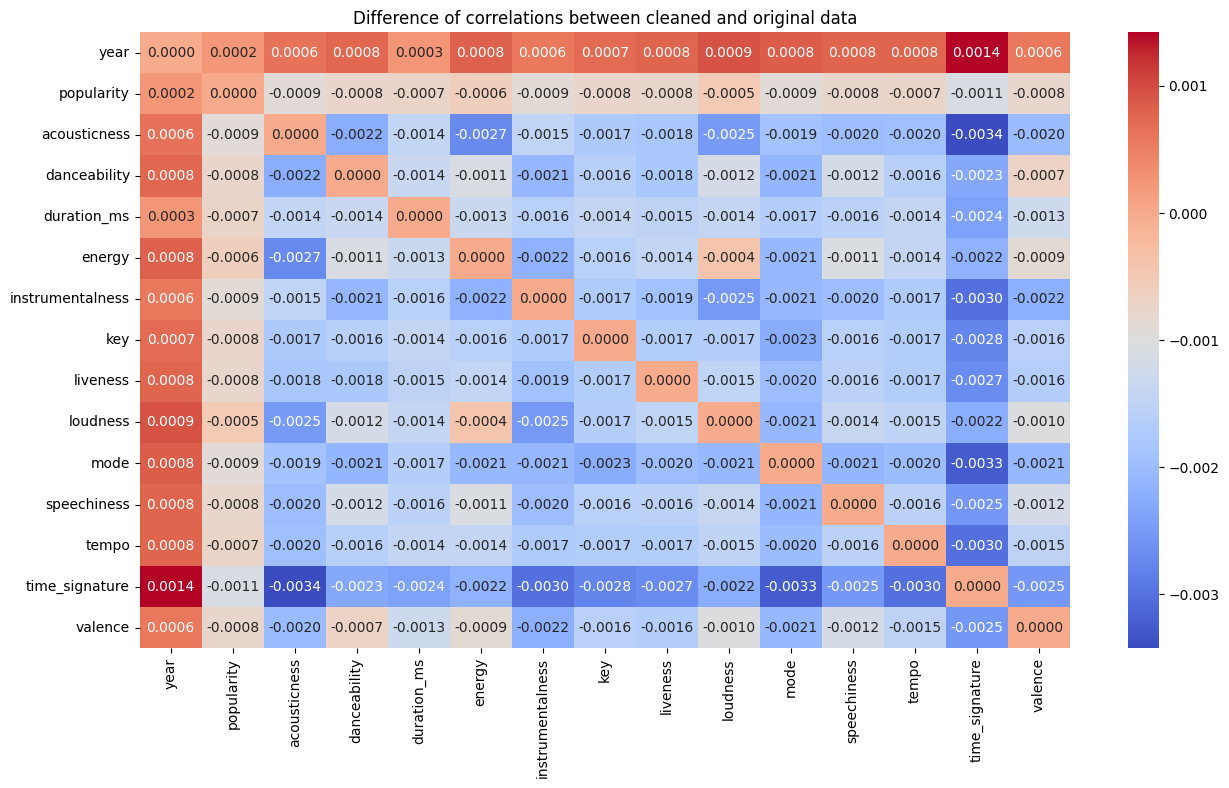

In [19]:
num_copy_data = copy_data.select_dtypes(include=[np.number])
num_data = data.select_dtypes(include=[np.number])

spearman = num_copy_data.corr(method='spearman') #clean data
spearman2 = num_data.corr(method='spearman') #original data

fig, axs = plt.subplots(1, 1, figsize=(15, 8))
diff = spearman-spearman2
sns.heatmap(diff, annot=True, fmt='.4f', cmap='coolwarm')
axs.set_title('Difference of correlations between cleaned and original data')